[![colab-logo](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/japan-medical-ai/medical-ai-course-materials/blob/master/notebooks/Introduction_to_ML_libs.ipynb)

# 機械学習ライブラリの基礎

ここでは，代表的な機械学習アルゴリズムの紹介とチューニングのポイントをその数学的な背景と合わせて紹介します．
機械学習の考え方を身に着ける練習として，単回帰分析と重回帰分析のアルゴリズムを扱います．これらを学ぶことで線形代数，統計，微分についての理解が深まります．

## 単回帰分析

機械学習アルゴリズムの第一弾として，最も基本的な単回帰分析について紹介します．ここで微分を含む基礎的な数学とそれに対応する機械学習アルゴリズムを交互に学びながら，知識を深めていきます．

単回帰分析は教師あり学習の一種です．その中でも，数値（厳密には連続値）を予測する**回帰**を取り扱う手法です．単回帰分析は，ひとつの入力変数からひとつの出力変数を予測する機械学習アルゴリズムです．

### 問題設定

例として家賃の予測を考えます．この場合，家賃が出力変数 $y$ となります．

次に入力変数として何を採用するかを考えます．機械学習は，データをもとに学習しますが，一番最初にどのデータを使ってどの値を予測させるかは人間側で決めなければなりません．そのため，入力変数として何を採用するかといった問題は，人間側の経験に依存します．例えば，家賃の予測では，部屋の広さか，駅からの距離か，それとも犯罪発生率を入力変数として採用するかの自由度があります．例えばここでは部屋の広さを入力変数$x$として採用することとします．実際には，このように複数の候補があった際に，それらすべてを考慮できるようなモデル化を採用するのが一般的であり，それはこの次の重回帰分析以降で紹介していきます．

機械学習アルゴリズムは，どの手法も大きく分けて次の3つのステップで成り立っています．

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

まず**Step1は**では**モデル**を消えます．このモデルとは出力変数$y$と入力変数$x$の関係を定式化したものです．家賃の予測値を$y$とした際に，どのように定式化すればうまく予測することができるのか．このモデル設計は現在は人手で行うのが一般的であり，機械が自動的に決めてくれるわけではありません（一方で最近のAutoMLなど，モデルも自動決定する研究が進展しています）

![01.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/01.png)

例えば，与えられたデータセットにおいて，家賃と部屋の広さの関係が次のようになっているとします．この場合，部屋の広さが広くなるほど，家賃が高くなっている関係がみられ，予測のために直線を書くのが妥当にみえます．

![02.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/02.png)

直線の式は$y=ax+b$ で表され，$a$ を傾き，$b$ を切片とよばれるパラメータです．

今回，このデータセットに対して，直線を引くことが適切であると（人間側の経験で）判断したため，以下のようにモデルを決める．
$$
y = wx + b
$$
傾き $a$ の箇所が $w$ となっているが，一般的に機械学習では，傾きの箇所を**重み (weight)** $w$, 切片 $b$ の箇所を**バイアス (bias)** $b$ で記述することが多いので覚えておいてほしい．

単回帰分析では，このようにモデルを直線 $y = wx + b$ と決めて，その重みとバイアスの値をデータにうまく合うように調整します．この調整される変数のことを**パラメータ**と呼びます．つまり，今回は $w$ と $b$ がパラメータです．多くの機械学習ではこのようなパラメータで特徴付けられたモデルを使い，データにあうように最適なパラメータを求めることが目標となります．先程の例ではデータとは，部屋の広さ $x$ と教師データとなる家賃 $t$ のことであり，$\mathcal{D} = \{x_i, t_i\}_{i=1}^{N}$ として表す．ここで，添え字 $i$ ($i=1,2,\ldots,N$)は$i$番目の物件という意味であり，$N$は全体の物件数のことである．この$N$を**サンプル数**という．

ここで，この後の計算を楽に進めるために，**データの中心化**というテクニックを使う．これはデータの重心（全部のデータの平均）を0とした中央に配置するように変換の処理を施す．この中心化は前処理として行うことが一般的である（分散/標準偏差も1とする正規化もよく使われる．

![03.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/03.png)

中心化によって，求める直線のバイアス $b$ が0となり，$y_{c} = wx_{c}$ とすることができ，調整すべきパラメータを2つから1つに減らすことができる，ただし$x_c, y_c$は中心化を適用した後の値である．

![04.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/04.png)

データの中心化は入出力の平均をデータの全体から引くことで実現されます．つまり，
$$
\begin{aligned}
x_{c} &= x - \bar{x} \\
t_{c} &= t - \bar{t}
\end{aligned}
$$
を行います．

例えば，具体的な数値で見ると，下図のようになります．

![05.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/05.png)

中心化後を示す添え字の $c$ に関しては表現が冗長となるため，今後はこの添え字を省略し，データの中心化を事前に行っていることを前提とします．この時，モデルは
$$
y = wx
$$
となり，単回帰分析の目標は，データセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ に基づいて，パラメータ$w$ を適切に調整することになります．

### Step2. 目的関数を決める

どれだけ目標を達成しているかを表す関数を**目的関数**とよびます．分野によっては評価関数ともよばれます．

今回は教師データと予測値が一致することが目標であり，それを表す目的関数として教師データと予測値の二乗誤差を使います．二乗誤差が0であるとき，またその時のみt = y となり，完璧な予測を達成しているといえます，$n$ 番目の物件に対する教師データ$t_{n}$ と予測値$y_{n}$の二乗誤差は
$$
(t{_n} - y_{n})^{2}
$$
となります．これを全物件で考慮する必要があるため，最終的な目的関数は
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + (t_{N}-y_{N})^{2} \\
&=\sum^{N}_{n=1}\left( t_{n}-y_{n}\right)^{2}\\
\end{aligned}
$$
となります．また，Step1で決めたモデルより，
$$
y_{n} = wx_{n}
$$
となるため，目的関数は
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-wx_{n}\right)^{2}
$$
とパラメータを含んだ形式で表現することができます．機械学習ではこのような望ましい時に値が$0$であり，望ましくない時に大きな正の値となるような関数を目的関数とします．このような関数を**損失関数**と呼び，その値を**損失**とよびます．多くの場合複数の教師データからなる学習問題では各教師データに対する損失関数の和を目的関数とし，それを最小化することで望ましい状態を達成することを目指します．$

### Step3. 最適なパラメータを求める 

最後は目的関数を最小化するようなパラメータを求めます．ここで，ある関数を最小化する点を求める方法としては微分が使えることをすでに学んでいます．今回のような差の二乗の場合微分して「傾き0」となる点が損失が$0$となる点です．目的関数の微分求めると，次のようになります．
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}  &= \dfrac{\partial}{\partial w} { \sum^{N}_{n=1} ( t_{n}-wx_{n})^{2} }\\
\end{aligned}
$$
ここで，微分が線形性の性質を持つことを使う，特に和の微分は微分の和であることを利用し次を得ます
$$
\dfrac{\partial}{\partial w} \mathcal{L}=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
ここでは微分と総和 $\sum$ の記号が交換しています．なお微分と積分$\int$は常に交換できるとは限りません．次に和の各項をみると
$$
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
の部分は合成関数になっていることがわかります．$u_{n} = t_{n} - wx_{n}$ とおくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2} &=  \dfrac {\partial }{\partial w} f(u_{n}) \\ \because f(u_{n}) &= u_{n}^{2}\\
\Rightarrow \dfrac {\partial }{\partial w} f(u_{n}) &= \dfrac {\partial u_{n}}{\partial w} \dfrac{\partial f(u_{n})}{\partial w} \\
&=-x_{n} \times 2 \left( t_{n}-wx_{n}\right)  \\
&= -2x_{n}( t_{n}-wx_{n} )
\end{aligned}
$$
が得られます．これより，
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}
&=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
\\&=-\sum^{N}_{n=1}2x_{n}\left( t_{n}-wx_{n}\right)
\end{aligned}
$$
となります．この微分の値が0となるように$w$を決めていくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w} \mathcal{L} &=0\\
-2\sum^{N}_{n=1}x_{n}\left( t_{n}-wx_{n}\right) &=0\\
-2 \sum^{N}_{n=1}x_{n}t_{n} + 2\sum^{n}_{n=1}wx^{2}_{n}&=0\\
-2\sum^{N}_{n=1}x_{n}t_{n}+2w\sum^{N}_{n=1}x^{2}_{n}&=0\\
w\sum^{N}_{n=1}x^{2}_{n}&=\sum^{n}_{n=1}x_{n}t_{n}\\
\Rightarrow w&=\dfrac {\displaystyle  \sum^{N}_{n=1}x_{n}t_{n}}{\displaystyle  \sum^{N}_{n=1}x^{2}_{n}}
\end{aligned}
$$
となります．この求まったパラメータはデータセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ のみから決定されていることが確認できます．

次に例題にあげていた数値例でパラメータ $w$ を求めてみます．まずは，データの中心化を行います．最初に平均を求めます．
$$
\begin{aligned}
\bar{x} &= \dfrac{1}{3} (1 + 2 + 3) = 2 \\
\bar{t} &= \dfrac{1}{3}(2 + 3.9 + 6.1) = 4
\end{aligned}
$$
そして，各変数に対して前処理として，平均を引く中心化の処理を施します．
$$
\begin{aligned}
x_{1} &= 1 - 2 = -1 \\
x_{2} &= 2 -2 = 0 \\
x_{3} &= 3- 2 = 1\\
t_{1} &= 2 - 4 = -2\\
t_{2} &= 3.9 - 4 = -0.1\\
t_{3} &= 6.1 - 4 = 2.1 
\end{aligned}
$$
そして，中心化後の値を用いて，最適なパラメータ$w$を導出します．
$$
\begin{aligned}
w &= \dfrac{\displaystyle \sum_{n=1}^{N}x_{n}t_{n}}{\displaystyle  \sum_{n=1}^{N}x_{n}^{2}} \\
&= \dfrac{x_{1}t_{1} + x_{2}t_{2} + x_{3}t_{3}}{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \\
&= \dfrac{-1 \times (-2) + 0 \times 0.1 + 1 \times 2.1}{(-1)^{2} + 0^2 + 1^2} \\
&= 2.05
\end{aligned}
$$
これで単回帰分析の学習の手順が完了しました．．この求まったパラメータを使用したモデルが学習済みモデルとよばれます．

このモデルを使って新しいサンプルに対する予測をしてみましょう．例えば，新しいサンプル$x_{q}=1.5$ に対する予測値は次のように求まります．

$$
\begin{aligned}
y_{q} - \bar{t} &= w(x_{q}-\bar{x}) \\
\Rightarrow y_{q} &= w(x_{q}-\bar{x}) + \bar{t} \\
&= 2.05 \times (1.5 - 2) + 4 \\
&= 2.975
\end{aligned}
$$

単回帰解析は単純ですがこれで機械学習の一通りを学ぶことができます．

## 重回帰分析

次に，多変数の入力変数を扱う重回帰分析を扱います．この重回帰分析を学ぶことで線形代数に関する知識が深まります．

重回帰分析は単回帰分析と同様に教師あり学習の一種であり，回帰を取り扱う手法です．問題設定は，ほとんど単回帰分析と同じですが，重回帰分析では入力変数の数が複数となります．つまり，複数の入力変数から出力変数を予測できるような機械学習アルゴリズムです．

### 問題設定

ここでは単回帰分析の場合と同様，家賃の予測を考え，家賃を出力変数$y$とします．そして，入力変数としては，前回の単回帰分析で考慮できなかった駅からの距離や犯罪発生率なども考慮していきます．例えば，部屋の広さ$x_{1}$, 駅からの距離$x_{2}$, ..., 犯罪発生率$x_{M}$ のように $M$ 個の入力変数があるとします．

単回帰分析と同様，以下の3つのステップで学習してきます．

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

単回帰分析のモデルは，
$$
y = wx + b
$$
であり，$w$を重み（weight），$b$をバイアス(bias)と呼びました．重回帰分析では，この式を複数の入力変数に拡張し，
$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$
のような線形結合の形で表します．この場合，各変数は独立に出力変数を影響を与えるというようなモデル化であり，かなり単純なモデル化といえます．実際は問題にあわせて様々なモデルを考えそれらを選択する必要があります．それらについては今後説明していきます．

重回帰分析のモデルは，和の記号を使って次のように書くことができます．
$$
y = \sum_{m=1}^{M} w_{m} x_{m} + b
$$
これをベクトルを使って表してみる．単回帰分析では，データの中心化によって，バイアス$b$を無視できように式変形を行ったが，前回はそれによって，求めるべきパラメータが$w$の１つだけになり，手計算の量が減るというメリットがあった．重回帰分析では，$b$が省略できたところで，パラメータの数が$M+1$個から$M$個に減るだけでほとんどメリットがない．そこで，入力変数で値が常に$1$であるような仮想変数$x_0 = 1$を加え，$w_0$をバイアスに対応させるようにする．
$$
\begin{aligned}
y&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b\\
&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+w_{0} x_{0}\\
&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
\end{aligned}
$$
このようにバイアス$b$を重みに包含して書く記法は多くの登場する．そして，この式を整理していくと，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
w_{0} & w_{1} & \ldots  & w_{n}
\end{bmatrix}\begin{bmatrix}
x_{0} \\
x_{1} \\
\vdots  \\
x_{M}
\end{bmatrix}\\
&=w^{T}x
\end{aligned}
$$
のように，ベクトルの内積で表現することができます．また，今後取り扱う際には，$x$が前に来ているほうが何かと便利なことからこれと等価な，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
x_{0} & x_{1} & \ldots  & x_{n}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
&=x^{T}w
\end{aligned}
$$
として表すこともできます．今後はこちらを採用していきます．

### Step2. 目的関数を決める

単回帰分析では，教師データ$t$と予測値$y$の二乗誤差が小さいほど，良い予測であるとし，この総和を目的関数として定めました．重回帰分析でも，予測値$y$を求めるということは同じであるため，次のような同じ目的関数を使います．
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}
\end{aligned}
$$
単回帰分析では，これを
$$
\mathcal{L}=\sum^{N}_{n=1} ( t_{n} - y_{n})^{2}
$$
のように，総和の記号を使ってまとめていましたが，ここでも線形代数で学んだテクニックを活かして，
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}\\
&=\begin{bmatrix} t_{1} - y_{1} & t_{2}-y_{2} & \ldots & t_{N}-y_{N} \end{bmatrix} \begin{bmatrix}
t_{1}-y_{1} \\
t_{2}-y_{2} \\
\vdots \\
t_{N}-y_{N}
\end{bmatrix}\\
&=\left( t-y\right)^{T}\left( t-y\right) 
\end{aligned}
$$
のようにベクトルの内積で表現できます．また，$y$に関して，Step3に入る前に式を整理しておくと，
$$
\begin{aligned}
y=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}=\begin{bmatrix}
x_{1}^{T}w \\
x_{2}^{T}w \\
\vdots  \\
x_{N}^{T}w
\end{bmatrix}
=\begin{bmatrix}
x_{1}^{T} \\
x_{2}^{T} \\
\vdots  \\
x_{N}^{T}
\end{bmatrix}
w
\end{aligned}
$$
のように，書くことができます．整理すると
$$
\begin{aligned}
y&=
\begin{bmatrix}
x_{10} & x_{11} & x_{12} & \ldots  & x_{1M} \\
x_{20} & x_{21} & x_{22} & \ldots  & x_{2M} \\
\vdots  & \vdots  & \ddots  & \vdots  \\
x_{N0} & x_{N1} & x_{N{2}} & \ldots  & x_{NM}
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
\Rightarrow y&=Xw
\end{aligned}
$$
と表記できます．ここでは$X$の行（横）方向が各サンプルを表しており，例えば各物件に相当します．列（縦）方向が入力変数を表しており，例えば，部屋の広さや駅からの距離などの各サンプルの値が入っています．例えば，部屋の広さ50m$^{2}$で駅からの距離600m, 犯罪発生率2%のような物件の場合，
$$
x^{T} = \begin{bmatrix}
1 & 50 & 600 & \cdots & 0.02
\end{bmatrix}
$$
のようにデータ表現されています．先頭の $1$ はバイアスを包含する際に使用している$x_{0}$であることに注意してください．

### Step3. パラメータを最適化する

それでは，Step1で定めたモデルのパラメータを，Step2で定めた目的関数を最小化するように決めていきます．

まずは目的関数に関して，パラメータ$w$で表現できるように式変形を行うと，
$$
\begin{aligned}
\mathcal{L}&=\left( t-y\right)^{T}\left( t-y\right) \\
&=\left( t-Xw\right)^{T}\left( t-Xw\right) \\
&= \left\{ t^{T}-(Xw)^{T}\right\}\left( t-Xw\right) \\
&=\left( t^{T}-w^{T}X^{T}\right)\left( t-Xw\right)
\end{aligned}
$$
となります．ここでは，転置の公式 $(AB)^{T} = B^{T}A^{T}$ を使っています．さらに分配法則を使って展開を進めていくと，
$$
\begin{aligned}
\mathcal{L}&=t^{T}t-t^{T}Xw-w^{T}X^{T}t + w^{T}X^{T}Xw\\
\end{aligned}
$$
となります．この目的関数に対しパラメータの$w$について偏微分をとりたいが，その前にこの式はもう少し整理することができます．はじめに，
$$
(1)^T = 1
$$
というように，スカラーは転置しても同じです．上式の中で出てくる $t^{T}Xw$ はスカラーなので，
$$
(t^{T}Xw)^{T} = t^{T}Xw
$$
が成り立ちます．さらに，転置の公式 $(ABC)^T = C^TB^TA^T$ より，
$$
(t^{T}Xw)^T = w^{T} X^{T} t
$$
も成り立ちます．これより，
$$
(t^{T}Xw)^{T} = t^{T}Xw = w^{T} X^{T} t
$$
を導くことができます．これを使って目的関数を
$$
\begin{aligned}
\mathcal{L}=t^{T}t-2t^{T}Xw + w^{T}X^{T}Xw\\
\end{aligned}
$$
とまとめることができます．次に$w$に関する偏微分をとるにあたって

$w$に以外の定数項をまとめると，
$$
\begin{aligned}
L&=t^{T}t-2t^{T}Xw+w^{T}X^{T}Xw\\
&=t^{T}t-2\left( X^{T}t\right)^{T} w+w^{T}X^{T}Xw \\
&=c+b^{T}w+w^{T}Aw 
\end{aligned}
$$
が得られます．これは，線形代数で学んだ$w$に関する二次関数となっており，$A= X^{T}X, \ b =-2 X^{T}t, \ c=t^{T}t$ と表せます．ここで，$b$ を転置の形式にした理由は，線形代数で学んだベクトルで微分の公式の形式に合わせるためである．

それでは，目的関数を最小化することができるパラメータ$w$の求め方を考える．先述の通り，目的関数はパラメータ$w$に関して二次関数である．例えば，
$$
\begin{aligned}
w = \begin{bmatrix}
w_{1} \\ w_{2}
\end{bmatrix}, 
A=\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},b=\begin{bmatrix}
1 \\
2
\end{bmatrix},C=1
\end{aligned}
$$
のように具体的な数値例で考えてみると，
$$
\begin{aligned}
\mathcal{L} &=
w^{T}Aw+b^{T}w+c\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}
+\begin{bmatrix}
1 & 2
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}+1\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}
\begin{bmatrix}
w_{1}+2w_{2} \\
3w_{1}+4w_{2}
\end{bmatrix}+w_{1}+2w_{2}+1\\
&=w_{1}\left( w_{1}+2w_{2}\right) +w_{1}\left( 3w_{1}+4w_{2}\right) +w _{1}+2w_{2}+1\\
&=w^{2}_{1}+5w_{1}w_{2}+4w^{2}_{2}+w_{1}+2w_{2}+1 \\
\end{aligned}
$$
となり，$w_{1}, w_{2}$に関してそれぞれまとめると，
$$
\begin{aligned}
\mathcal{L}
&=w^{2}_{1}+\left( 5w_{2}+1\right) w_{1} + 
\left( 4w^{2}_{2}+2w_{2}+1\right) \\
&=w^{2}_{2}+\left( 5w_{1}+2\right) w_{2}+\left( w^{2}_{1}+w_{1}+1\right) \end{aligned}
$$
のようにそれぞれの二次関数であることがわかります．

二次関数は一般に次のようなお椀型の形をとります．

![06.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/06.png)

これを3次元でイメージすると，下図のようになります．

![08.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/08.png)

そして，目的関数である二乗誤差の総和が最小となる点では各変数で微分した時の傾きが0となります．

![07.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/07.png)

この例では，$w_{1}$ と $w_{2}$ の２つのパラメータの場合で考えたが，これは $w_{1}$, $w_{2}$, $\ldots$, $w_{M}$ の場合でも同様に考えることができ，目的関数が最小となる点は
$$
\begin{cases}
\dfrac {\partial }{\partial w_{0}}\mathcal{L}=0\\
\dfrac {\partial }{\partial w_{1}}\mathcal{L}=0\\
\ \ \ \ \ \vdots \\
\dfrac {\partial }{\partial w_{M}}\mathcal{L}=0\\
\end{cases}
$$
となる点です．これをまとめると，

$$
\begin{aligned}
\begin{bmatrix}
\dfrac {\partial}{\partial w_{0}} \mathcal{L} \\
\dfrac {\partial}{\partial w_{1}} \mathcal{L} \\
\vdots  \\
\dfrac {\partial}{\partial w_{M}} \mathcal{L} \\
\end{bmatrix}&=\begin{bmatrix}
0 \\
0 \\
\vdots  \\
0 \\
\end{bmatrix} \\
\Rightarrow \dfrac {\partial}{\partial w} \mathcal{L} &= 0 \\
\end{aligned}
$$

のように表されます．あとは，上式を満たすように$w$を決めていけばいきます．下記の計算にはベクトルの微分をはじめとして，線形代数で学んだ内容を利用しています．必要に応じて線形代数の章を確認してください．

$$
\begin{aligned}
\dfrac {\partial }{\partial w}\mathcal{L}
&= \dfrac {\partial }{aw}\left( c+b^{T}w+w^{T}Aw\right) \\
&\Rightarrow \dfrac {\partial }{\partial u}\left( c\right) +\dfrac {\partial }{\partial w}\left( b^{T}w\right) +\dfrac {\partial }{\partial w}\left( w^{T}Aw\right) 
= 0\\
&\Rightarrow 0+b+\left( A+A^{T}\right) w =0\\
&\Rightarrow -2X^{T}t+\left\{ X^{T}X^{T}\left( X^{T}X\right)^{T}\right\} w
=0\\
&\Rightarrow -2X^{T}t+2X^{T}Xw=0\\
&\Rightarrow X^{T}Xw=X^{T}t\\
&\Rightarrow \left( X^{T}X\right)^{-1}X^{T}X w =\left( X^{T}X\right)^{-1}X^{T}t \\
Iw&=\left( X^{T}X\right)^{-1}X^{T}t \\
w&=\left( X^{T}X\right)^{-1}X^{T}t
\end{aligned}
$$

ここで，$I$は単位行列です．このように，最適なパラメータは与えられているデータセット $X, t$ から求まります．また，式変形の際には
$$
w = \dfrac{X^{T}t}{X^{T}X}
$$
のような分数が表れないように注意してください．これは行列の計算には割り算がないためです．そのため，逆行列を使って行列積のみで計算しています．

また，もうひとつよくある間違いとして，
$$
\begin{aligned}
X^{T}Xw&=X^{T}t\\
\Rightarrow \left( X^{T}\right) ^{-1}X^{T}Xw&=\left( X^{T}\right) ^{-1}X^{T}t\\
\Rightarrow Xw&=t\\
\Rightarrow X^{-1}Xw&=X^{-1}t\\
\Rightarrow w&=X^{-1}t
\end{aligned}
$$
のような式変形をする場合もみられます．しかし，これは一般的には成立しません．なぜなら，線形代数の章で説明した逆行列を持つための条件として，行列は正方行列であるという条件を満たしていないためです．一般的に，サンプル数$N$と入力変数の数$M$は等しくないため$X$は正方行列ではなく，逆行列をもちません．それに対し，$X \in \mathcal{R}^{N \times M}$ の場合，$X^{T}X \in \mathcal{R}^{M\times M}$ となり，サンプル数に依存することなく，常に正方行列となります．

また

また$X^T X$が正方行列だからといって必ず逆行列を持つとは限らない，または逆行列を持ったとしても数値計算が不安定になるという問題がある．これについて，今回は解説しないが，疑似逆行列とよばれる手法を使うことが多い．

推論の際は学習で得られたパラメータ$w$を用いて，
$$
y = w^{T}x
$$
のように計算すれば良い．



## Numpyによる実装

それでは，重回帰分析の実装を行います．PythonにはNumpyと呼ばれる線形代数を簡単に扱えるライブラリが広く使われている．次の章で紹介するChainerの中でもNumpyは多用されている．

Pythonの文法に関しては把握していることを前提に進めてきます．具体的には，変数（数値・文字列，リスト，タプル，辞書），制御構文（for，if），関数，クラスを理解している必要があります

重回帰分析では，最終的に最適なパラメータ $w$ が
$$
w=\left( X^{T}X\right)^{-1}X^{T}t
$$


で求まります．この最適なパラメータを求めるため次の5つを扱います．

- ベクトルの定義
- 行列の定義
- 転置
- 行列積
- 逆行列

具体的に，以下のようなデータセットが与えられているケースを想定してみましょう．

$$
X = 
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 3 & 4 \\  
1 & 5 & 9 
\end{bmatrix}, \
t = 
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$

それぞれの実装について，見ていきましょう．まずは，Numpyの読み込みから始めます．numpyはnpと省略するのが一般的です．

In [0]:
import numpy as np

ベクトルの定義は以下のように行います．

In [0]:
t = np.array([[1], [5], [6], [8]])

In [3]:
print(t.shape)

(4, 1)


つぎに，行列の定義も行いましょう．

In [0]:
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])

In [5]:
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


次は行列の転地を行う．Numpyの`array`で定義されている場合，`.T`をつけるだけで転置ができる．

In [6]:
print(X.T)

[[1 1 1 1]
 [2 2 3 5]
 [3 5 4 9]]


次に，行列積は `np.dot` によって実現できる．行列積の際には最初の行列の列数と二番目の行列の行数が同じであることに注意する．

In [0]:
XX = np.dot(X.T, X)

In [8]:
print(XX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


つぎに，この逆行列を求めるには，`np.linalg.inv` を用いる．

In [0]:
XX_inv = np.linalg.inv(XX)

In [10]:
print(XX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


これで重回帰分析のために必要な演算がそろった．最適なパラメータを求めると，

In [0]:
Xt = np.dot(X.T, t)

In [12]:
print(Xt)

[[ 20]
 [ 70]
 [124]]


In [0]:
w = np.dot(XX_inv, Xt)

In [14]:
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


このように求まります．Numpyを使うことで，数式をそのままプログラミング上で書くことができます．


## Scikit-learnによる本格的な実装

重回帰分析であればNumpyで簡単に実装することができましたが，本格的に使用していくアルゴリズムは初学者が一から書くには難しく，またその必要はない．PythonではScikit-learnと呼ばれる機械学習用のフレームワークが公開されており，初学者でも簡単に扱うことができます．

まずは重回帰分析をScikit-learnによって実装してみましょう．

### Scikit-learn基礎編

Scikit-learnは`sklearn`という名前で呼び出すことができます．

In [0]:
import sklearn

たとえば，重回帰分析を使用する場合は以下のように呼び出す．

In [0]:
from sklearn.linear_model import LinearRegression

なお，numpyの時もそうだが，使い方を調べる際，[公式のリファレンス](http://scikit-learn.org/)に加えて，「重回帰分析 Scikit-learn」というように検索して，実例のソースコードを見るほうが早い場合も多くあります．

はじめにアルゴリズムのインスタンス化を行います．

In [0]:
model = LinearRegression()

これで重回帰分析を使用するための準備がおわりました．次にパラメータの学習も以下のように行います．

In [18]:
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

最後にどのような結果が得られたかの検証は次のように行なえます．

In [19]:
model.score(X, t)

0.6923076923076923

回帰では**決定係数**と呼ばれる指標が，分類の場合は**精度**が自動的に計算されるようになっている．どちらも1に近ければうまくモデルがデータを説明できていることになります．
このように，簡単なインターフェースで機械学習のモデルを構築し，学習できるようになっています．Scikit-learnの良い点は最初にアルゴリズムを決めてしまえば，どのアルゴリズムでも，`.fit`で学習，`.score`で検証が行える点です．

また，アルゴリズムによって内容は多少異なるが，パラメータもインスタンス変数として格納されているため，学習後に確認することができます．

In [20]:
# パラメータw
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [21]:
# バイアスb
model.intercept_

array([-0.14285714])

この例からわかるように，Scikit-learnでは，パラメータとバイアスがそれぞれ準備されているため，入力変数$X$の左端の列に1を格納した変数を入れる必要はありません．

### Scikit-learn応用編

Scikit-learnは機械学習の実装を支援する多くの機能を兼ね備えています．

まず最初にサンプルのデータセットの取り扱いを紹介します．Scikit-learnには学び始めでテストするために，データセットがいくつか提供されています．今回は，この提供されているデータセットの中で`load_boston`というボストン近郊の家賃に関するデータセットを使って説明してきます．

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

変数の`boston`には辞書と同じ形式で格納されており，変数の中身を見ながら入力変数と教師データに対応するものを見つけていきます．

In [0]:
X = boston['data']
t = boston['target']

In [25]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [26]:
print(t)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Numpyの形式で入力変数と教師データが格納されており，`.shape`を使うことで行と列の数を確認できる．

In [27]:
X.shape

(506, 13)

In [28]:
t.shape

(506,)

つぎに，訓練データと検証データの分割です．学習の時と同じデータを使って性能を検証した場合，モデルが学習データだけをうまくモデル化し，同じような分布からとられた未知のデータはうまくいかない場合があります．これを過学習とよびます．機械学習ではこれを防ぐために学習データと別に性能を評価する検証データを分けて評価します．このように分割して検証することを**ホールドアウト法**とよびます．

Scikit-learnではこの訓練用と検証用を分割する機能が準備されています．

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [31]:
X_train.shape

(354, 13)

In [32]:
X_test.shape

(152, 13)

引数の`test_size`は検証用に使うデータの比率であり，0.3と指定すると全体の30%が検証データとなります．また，`random_state`は乱数のシードであり，再現性を確保するためのものです．なぜ乱数が登場するかというと，前から70%を訓練用，残りを検証用とするのではなく，全体からランダムに選択した70%を訓練用，残り30%を検証用と選択しているためです．

そして，訓練データを使って学習します．

In [0]:
model = LinearRegression()

In [34]:
model.fit(X_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

検証を行う場合は，訓練データと検証データの両方に対してチェックしておくと良いでしょう．

In [35]:
# 訓練データ
model.score(X_train, t_train)

0.7644563391821222

In [36]:
# 検証データ
model.score(X_test, t_test)

0.6735280865347263

検証データだけでなく，訓練データでも検証することで学習に失敗している場合の問題を切り分けることができます．

|訓練データ|検証データ|結果|
|:--|:--|:--|
|×|×|未学習 アンダーフィッティング|
|〇|×|過学習 オーバーフィッティング|
|〇|〇|ＯＫ|


**アンダーフィッティング**の場合は，現状の機械学習アルゴリズムでうまくデータを扱えていない場合であり，アルゴリズムを変更したり，入力となるデータの特徴を表せるような変換を考えます．逆に**オーバーフィッティング**の時は，そのアルゴリズムでデータをモデル化できていることはわかっている．この場合，モデルを過学習させないようにする．代表的な方法として，**ハイパーパラメータ**と呼ばれる各アルゴリズムのパラメータの学習に使われるパラメータの値を調整していくことで解決できることがある．このハイパーパラメータの調整は後述する．

また，Scikit-learnでは，スケーリングも行うことができます．例えば，平均0，標準偏差1に変換するデータの正規化を行う場合は以下のようになります．

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# インスタンス化
scaler = StandardScaler()

In [39]:
# 平均の分散（標準偏差）を学習
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 変換
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [41]:
print(X_train_s)

[[-0.20416267 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38584317  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33266283 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38147768 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.3720831  -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38289844 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [42]:
print(X_test_s)

[[-0.39152624 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70825498 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38588517 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.6177735  -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34043865 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39601293 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]


## よく使われる機械学習アルゴリズムの紹介

ここからはよく用いられる機械学習アルゴリズムについて特徴とともに紹介していきます．ここでは概要だけ紹介するので気になった場合は参考図書を見て学びを深めてほしい．

Scikit-learnを使うことで実装は手軽に行うことができるが，内部挙動を理解していないがゆえに，うまくいかないときの対処法がわからないという問題もでてきます．ここでは．この問題につまずかないように，ハイパーパラメータのチューニングもあわせて紹介していきます．

### Support Vector Machine (SVM)

SVMはよく使われる手法の一つであり，入出力間の非線形性を捉えることができます．ただし，非線形なモデルの場合，$y=wx^2$や，$y=w\sin(x)$やその重ね合わせといったように組み合わせの候補が無限に存在するためモデルの設計は難しうなります．物理現象に基づいて入出力間の関係性が把握できていれば定式化のアイディアも存在しますが，そのような事前知識がある場合は多くはありません．そこで，SVMでは**カーネルトリック**と呼ばれるテクニックを利用し，データ間の類似度（カーネル）から入出力間の非線形性の定式化を行います．

SVMには連続値を予測する**回帰 (Regression)** とカテゴリを予測する**分類 (Classification)** の両方に対応した手法があります．それぞれ，Support Vector Regression (SVR) と Support Vector Classification (SVC) と呼びます．まずは回帰の問題設定で紹介し，前回のボストン近郊の家賃の予測の例題を取扱います．

#### Support Vector Regression (SVR)

In [0]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [45]:
# モデルのインスタンス化，学習
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.14680479454958428

In [47]:
# 検証（検証データ）
model.score(X_test, t_test)

0.01018093344367077

このようにSVRも，重回帰分析のケースとほとんど同じように実装できます．

しかし結果は重回帰分析に比べて良くなっているとはいえません．
ハイパーパラメータの調整が必要そうだが，その前に，スケーリングを行うことで改善ができる場合が多くあります．

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [49]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.697669153907031

In [51]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.5540391127752358

このように，大幅に結果を改善することができますスケーリングの影響を大きく受けるアルゴリズムと受けないアルゴリズムがあり，SVRを含むSVMはその影響を受けるアルゴリズムです．

最後に，さらに精度を上げるためにハイパーパラメータの調整を行います．ハイパーパラメータの調整を行うときに注意すべき点があります．それは訓練データ（train）はパラメータの調整に用いるが，検証データ（test）を見ながらハイパーパラーメータの調整を行なってはいけないということです．．検証データはあくまで未知のデータに対する性能検証を行うために用意したものであり，ハイパーパラメータの調整に検証データを使用してしまうと検証データの情報が学習にリークし正しい検証ができなくなります．

そこで，ハイパーパラメータの調整用にバリデーションデータ （val）を追加することが一般的です．

![09.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/09.png)

また，**交差検証法（クロスバリデーション）**という手法もあります．これは下図に示すようデータを複数パターン分割し，それらの性能の平均を評価する手法です．

![10.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/10.png)

この分割数 $K$ として，K-fold Cross Validation (CV)と呼ばれることも多くあります．例えば上記の例だと $K=3$-CVとなります．

それでは，SVRのハイパーパラメータ調整を交差検証法を使って行いましょう．Scikit-learnではハイパーパラメータ調整のための機能も`GridSearchCV`という名前で準備されています．グリッドサーチとは各組合せをすべて試す探索方法である．それ以外の方法として，ランダムサーチとベイズ最適化による探索もありますが，ここは余裕がでてきた段階でさらに深める内容のひとつとしてください．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [54]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

交差検証法とハイパーパラメータのグリッドサーチもこれで完了です．各ハイパーパラメータでの結果ももちろん確認することができ，最も結果の良かったハイパーパラメータの値を引き継いだモデルの選択もできます．

In [55]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -40.88957, std: 12.03388, params: {'C': 1, 'gamma': 0.01},
 mean: -34.94548, std: 12.18057, params: {'C': 1, 'gamma': 0.1},
 mean: -72.62060, std: 15.99632, params: {'C': 1, 'gamma': 1},
 mean: -86.25200, std: 16.38372, params: {'C': 1, 'gamma': 10},
 mean: -17.67763, std: 6.48783, params: {'C': 10, 'gamma': 0.01},
 mean: -16.46703, std: 7.03969, params: {'C': 10, 'gamma': 0.1},
 mean: -43.71719, std: 13.22953, params: {'C': 10, 'gamma': 1},
 mean: -81.13324, std: 15.21847, params: {'C': 10, 'gamma': 10},
 mean: -13.83363, std: 3.54540, params: {'C': 100, 'gamma': 0.01},
 mean: -14.61609, std: 7.20850, params: {'C': 100, 'gamma': 0.1},
 mean: -37.47299, std: 9.87515, params: {'C': 100, 'gamma': 1},
 mean: -77.95797, std: 12.36436, params: {'C': 100, 'gamma': 10}]

In [56]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 100, 'gamma': 0.01}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [58]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7685336670918768

ここまでがアルゴリズムの調整である．実際には特徴量の選択や外れ値除去など前処理も込みで行うため，ここまでシンプルに完了できるものではないが，まずはこの流れを覚えていただきたい．

1. スケーリング無　score:0.010
2. スケーリング有　score:0.554
3. スケーリング＋ハイパーパラメータの調整有　0.7685

#### Support Vector Classification (SVC)

次に，SVMの分類であるSVCも同様にスケーリングからハイパーパラメータの調整まで行う．分類の例題では，乳がんの患者か否かといったこれもScikit-learn側で準備されているデータセットを使用する．

In [0]:
# データセットの準備
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [60]:
X.shape

(569, 30)

In [61]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [62]:
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

上記からわかるように，入力変数のスケールは統一されていないことがわかる．

In [0]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [64]:
# スケーリング無で学習
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
# 検証（訓練データ）
model.score(X_train, t_train)

1.0

In [66]:
# 検証（訓練データ）
model.score(X_test, t_test)

0.631578947368421

分類では精度 (Accuracy) と呼ばれる指標の結果が得られる．例えば，100問中3問間違えると，Accuracyは0.97となる．

次にスケーリングを行った後に学習させる．

In [0]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [68]:
# スケーリングしたデータを用いて学習
model.fit(X_train_s, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9824120603015075

In [70]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

このように精度が大幅に高まったことがわかる．最後にハイパーパラメータのチューニングを行う．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [73]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVC(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96482, std: 0.01272, params: {'C': 1, 'gamma': 0.01},
 mean: 0.95226, std: 0.01543, params: {'C': 1, 'gamma': 0.1},
 mean: 0.62814, std: 0.00310, params: {'C': 1, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 1, 'gamma': 10},
 mean: 0.97487, std: 0.01972, params: {'C': 10, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 10, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 10, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 10, 'gamma': 10},
 mean: 0.94975, std: 0.01981, params: {'C': 100, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 100, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 100, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 100, 'gamma': 10}]

In [75]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [77]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9883040935672515

ハイパーパラメータの調整により，多少であるが改善することができた．

### Random Forest

つぎに，決定木 (Dicision Tree) のアンサンブル学習であるランダムフォレストを紹介する．こちらも実用上良く使われる手法である．ランダムフォレスト含めた決定木系の手法では入力変数のスケールの違いによる影響はほとんど受けない．また，**カテゴリカル変数**と呼ばれる定量評価を行うことが難しい変数（例えば，男性 or 女性）も定量化を気にすることなく扱うことができるメリットがある．回帰と分類と両方準備されているため，それぞれについて紹介する．

#### 回帰 (Regression)

In [0]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [80]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9827106387591679

In [82]:
# 検証（検証データ）
model.score(X_test, t_test)

0.8253491402788222

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [84]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9721252941946761

In [86]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.8070758556594833

このように，スケーリングによる影響はほとんどないことが経験的にもわかる．
また，Random Forest含めた決定木系の手法では，まずは条件分岐させる数である `max_depth` をハイパーパラメータとして調整することが多い．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [89]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -45.39943, std: 13.11535, params: {'max_depth': 1},
 mean: -24.64284, std: 7.10625, params: {'max_depth': 2},
 mean: -23.00834, std: 7.99062, params: {'max_depth': 3},
 mean: -19.58811, std: 5.74226, params: {'max_depth': 4},
 mean: -19.36648, std: 6.03968, params: {'max_depth': 5},
 mean: -16.72697, std: 6.46439, params: {'max_depth': 6}]

In [91]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 6}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [93]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.8210485221230714

今回はもともとオーバーフィッティングしていなかったため，ハイパーパラメータの調整によって改善することはなかったが，もちろんオーバーフィッティングしているケースには有効な施策である．

またランダムフォレストを含めた決定木系の手法の大きなメリットとして，各入力変数がどの程度重要であるかを定量評価した値が得られる．

In [94]:
# 各入力変数の重要度
model.feature_importances_

array([0.05015888, 0.00077746, 0.00376263, 0.00479107, 0.01185907,
       0.47868764, 0.00844228, 0.03243677, 0.00319549, 0.0143976 ,
       0.01143796, 0.00552612, 0.37452702])

重要度の総和が1になっており，この値を使って考察したり説明できるため，実務でよく見るポイントの一つである．

#### 分類 (Classification)

In [0]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [97]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
# 検証（訓練データ）
model.score(X_train, t_train)

1.0

In [99]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9649122807017544

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [101]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9974874371859297

In [103]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9473684210526315

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [106]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.92965, std: 0.01575, params: {'max_depth': 1},
 mean: 0.95226, std: 0.01969, params: {'max_depth': 2},
 mean: 0.94221, std: 0.00700, params: {'max_depth': 3},
 mean: 0.94724, std: 0.02206, params: {'max_depth': 4},
 mean: 0.94724, std: 0.02810, params: {'max_depth': 5},
 mean: 0.94472, std: 0.01968, params: {'max_depth': 6}]

In [108]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 2}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [110]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9064327485380117

In [111]:
# 各入力変数の重要度
model.feature_importances_

array([0.        , 0.00132636, 0.15402681, 0.        , 0.        ,
       0.        , 0.08069227, 0.        , 0.00862537, 0.        ,
       0.06109958, 0.        , 0.        , 0.07705514, 0.        ,
       0.00617919, 0.        , 0.        , 0.        , 0.        ,
       0.00791324, 0.        , 0.20231586, 0.08683122, 0.        ,
       0.02427364, 0.        , 0.25634921, 0.01406416, 0.01924793])

### ロジスティック回帰

シンプルであるが良く使われる手法のひとつである．回帰という名前がついているが，問題設定としては分類に使用する点に注意されたい．

In [0]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [114]:
# モデルのインスタンス化，学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.957286432160804

In [116]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9649122807017544

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [118]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9899497487437185

In [120]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [0.01, 0.1, 1, 10]}
]

In [123]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(LogisticRegression(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [124]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96985, std: 0.01223, params: {'C': 0.01},
 mean: 0.97990, std: 0.00935, params: {'C': 0.1},
 mean: 0.98492, std: 0.01624, params: {'C': 1},
 mean: 0.97236, std: 0.02323, params: {'C': 10}]

In [125]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 1}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [127]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

ロジスティック回帰の特徴は推論の時に出てくる．これまでの分類の手法であれば，新しいサンプルが得られた際の予測値は0か1かのカテゴリの値が得られる．Scikit-learnでは推論には`predict`を使用する．

In [0]:
# 訓練データの一番最初のサンプルで試しに推論
x_pred = [X_train_s[0]]
y = model.predict(x_pred)

In [129]:
print(y)

[1]


この結果はどの手法でも同じであるが，ロジスティック回帰を含めた**識別モデル**系の手法では，各カテゴリに属する確率まで求めることができる．

In [0]:
y = model.predict_proba(x_pred)

In [131]:
print(y)

[[0.00160119 0.99839881]]


総和が1となっており，確率が大きいほうのカテゴリ1が選ばれたことがわかる．異常か異常でないかといった分類の場合，異常or異常でないだけでなく，どのくらい異常そうであるかの確率までわかることで，閾値を設けやすくなる．この特性は次の章で紹介するニューラルネットワークでも同じである．

### k-means

最後は教師なし学習である**クラスタリング**の手法として有名なk-meansを紹介する．分類では教師データとしてどのカテゴリに属しているかがわかっていたが，クラスタリングではその教師データがない状況で学習を行う．基本的には距離的に近いものをまとめる．

例題では2つのクラスターをあらかじめ用意しておき，正しく分けられるかを確認する．

In [0]:
np.random.seed(0)

In [0]:
X1 = np.random.randn(50, 2) - 3
X2 = np.random.randn(50, 2) + 3

In [0]:
# 結合
X = np.r_[X1, X2]

In [135]:
X.shape

(100, 2)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

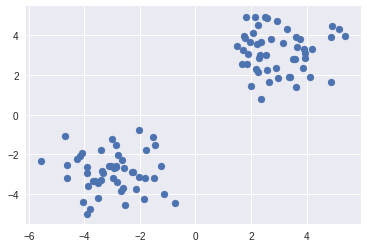

In [137]:
plt.scatter(X[:, 0], X[:, 1])

それでは，k-meansを用いてクラスタリングを行う．クラスタリングでは基本的にはわけるクラスターの数がハイパーパラメータとして必要である．`n_clusters`で指定する．

In [0]:
from sklearn.cluster import KMeans

In [139]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

予測した結果をもとにクラスタリングを行う．

In [0]:
y = model.predict(X)

In [141]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Numpyをうまく使うと，条件に当てはまるサンプルだけを抽出できる．

In [0]:
X0 = X[y==0]
X1 = X[y==1]

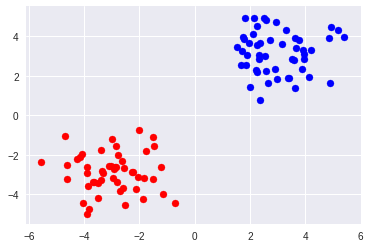

In [143]:
plt.scatter(X0[:, 0], X0[:, 1], color='red')
plt.scatter(X1[:, 0], X1[:,1 ], color='blue')